<a href="https://colab.research.google.com/github/kcarroth-dev/KarltonCarrothers_ML/blob/main/ECGR4105_Hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1

In [52]:
# Generic Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error

In [53]:
# Import csv data from my GitHub
cancer_url = 'https://raw.githubusercontent.com/kcarroth-dev/KarltonCarrothers_ML/main/cancer.csv'
housing_url = 'https://raw.githubusercontent.com/kcarroth-dev/KarltonCarrothers_ML/main/Housing.csv'


# Create dataframes for each url
dfc = pd.read_csv(cancer_url)
dfh = pd.read_csv(housing_url)

Problem 1

In [54]:
# Input and Output extraction
x = dfc.drop(columns=['diagnosis', 'id'])
y = dfc['diagnosis'].map({'M': 1, 'B': 0})  # Convert M to 1 and B to 0

# Scale the data using standardization
x = StandardScaler().fit_transform(x)

In [55]:
def train_SVM(x, y, kernel, N):

    precision_scores = []
    accuracy_scores = []
    recall_scores = []

    # Initialize variables for K Value and Accuracy
    best_K = None
    highest_accuracy = 0

    for K in N:
      # PCA Analysis
      pca = PCA(n_components=K)
      principalDf = pd.DataFrame(data = pca.fit_transform(x))

      # Split the data into training and validation sets
      x_train, x_test, y_train, y_test = train_test_split(principalDf.values, y, train_size = 0.8, test_size = 0.2, random_state = 0)

      # Perform classification
      classifier = SVC(kernel=kernel, C=3)
      classifier.fit(x_train, y_train)

      # Predictions of accuracy, precision and recall
      y_pred = classifier.predict(x_test)
      accuracy = accuracy_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred)
      recall = recall_score(y_test, y_pred)

      accuracy_scores.append(accuracy)
      precision_scores.append(precision)
      recall_scores.append(recall)

      # Check if this K has the highest accuracy
      if accuracy > highest_accuracy:
          highest_accuracy = accuracy
          best_K = K

    return accuracy_scores, precision_scores, recall_scores, highest_accuracy, best_K

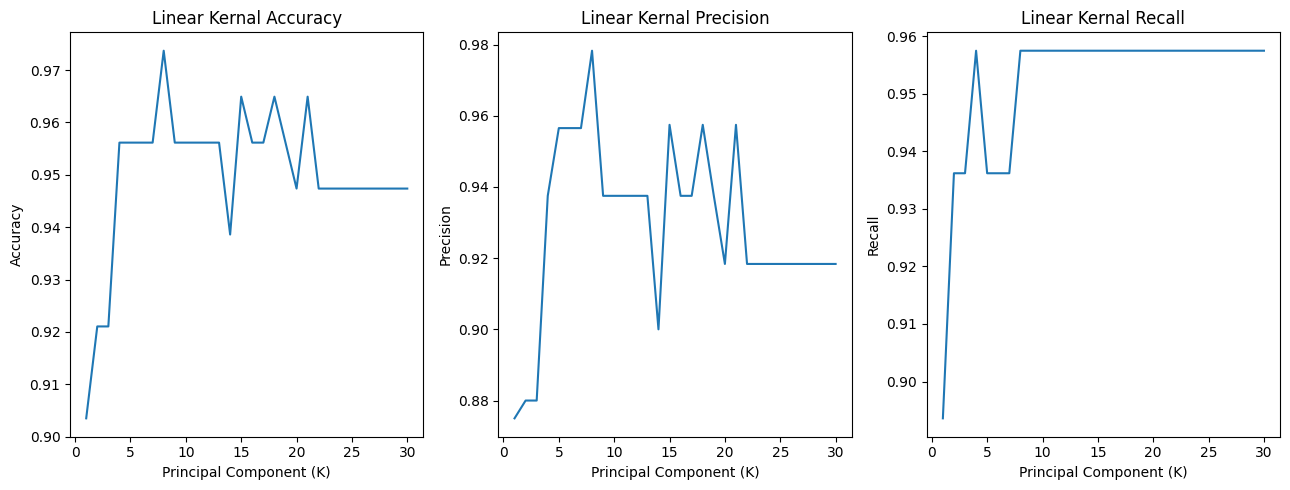

Optimum Number of K Principal Components: 8
Linear Highest Accuracy Value: 0.9736842105263158
Linear Precision at best K: 0.9782608695652174
Linear Recall at best K: 0.9574468085106383


In [56]:
N = [i for i in range(1, 31)]

accuracy, precision, recall, highest_acc, k_val = train_SVM(x, y, 'linear', N)

plt.figure(figsize=(13, 5))

plt.subplot(1, 3, 1)
plt.plot(N, accuracy)
plt.title('Linear Kernal Accuracy')
plt.xlabel('Principal Component (K)')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(N, precision)
plt.title('Linear Kernal Precision')
plt.xlabel('Principal Component (K)')
plt.ylabel('Precision')

plt.subplot(1, 3, 3)
plt.plot(N, recall)
plt.title('Linear Kernal Recall')
plt.xlabel('Principal Component (K)')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()

print(f'Optimum Number of K Principal Components: {k_val}')
print(f'Linear Highest Accuracy Value: {highest_acc}')

# Print precision and recall at the best K value
best_k_index = N.index(k_val)
print(f'Linear Precision at best K: {precision[best_k_index]}')
print(f'Linear Recall at best K: {recall[best_k_index]}')

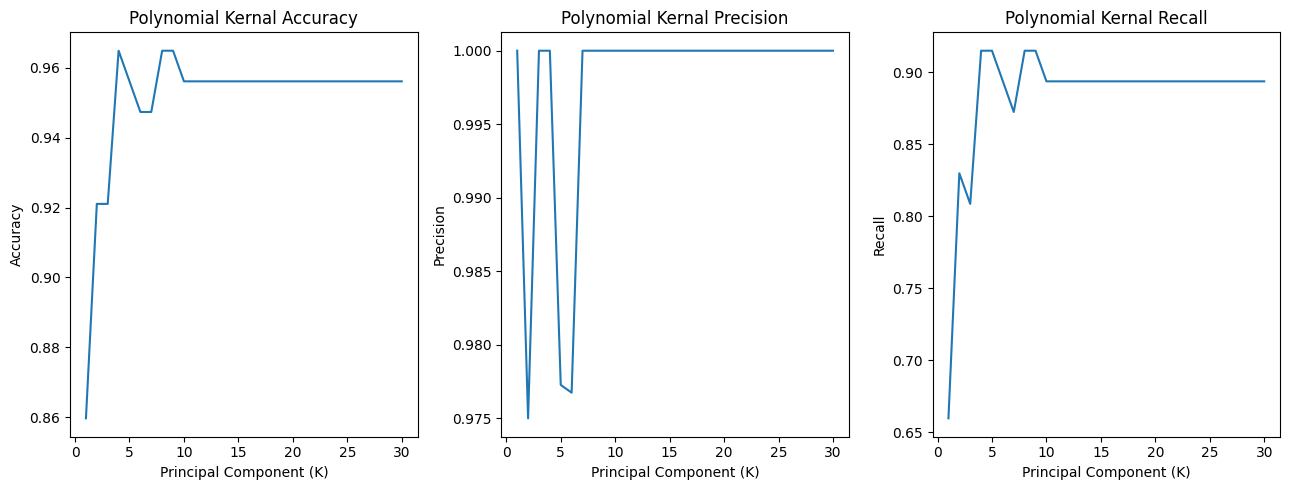

Optimum Number of K Principal Components: 4
Polynomial Highest Accuracy Value: 0.9649122807017544
Polynomial Precision at best K: 1.0
Polynomial Recall at best K: 0.9148936170212766


In [57]:
N = [i for i in range(1, 31)]

accuracy, precision, recall, highest_acc, k_val = train_SVM(x, y, 'poly', N)

plt.figure(figsize=(13, 5))

plt.subplot(1, 3, 1)
plt.plot(N, accuracy)
plt.title('Polynomial Kernal Accuracy')
plt.xlabel('Principal Component (K)')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(N, precision)
plt.title('Polynomial Kernal Precision')
plt.xlabel('Principal Component (K)')
plt.ylabel('Precision')

plt.subplot(1, 3, 3)
plt.plot(N, recall)
plt.title('Polynomial Kernal Recall')
plt.xlabel('Principal Component (K)')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()

print(f'Optimum Number of K Principal Components: {k_val}')
print(f'Polynomial Highest Accuracy Value: {highest_acc}')

# Print precision and recall at the best K value
best_k_index = N.index(k_val)
print(f'Polynomial Precision at best K: {precision[best_k_index]}')
print(f'Polynomial Recall at best K: {recall[best_k_index]}')

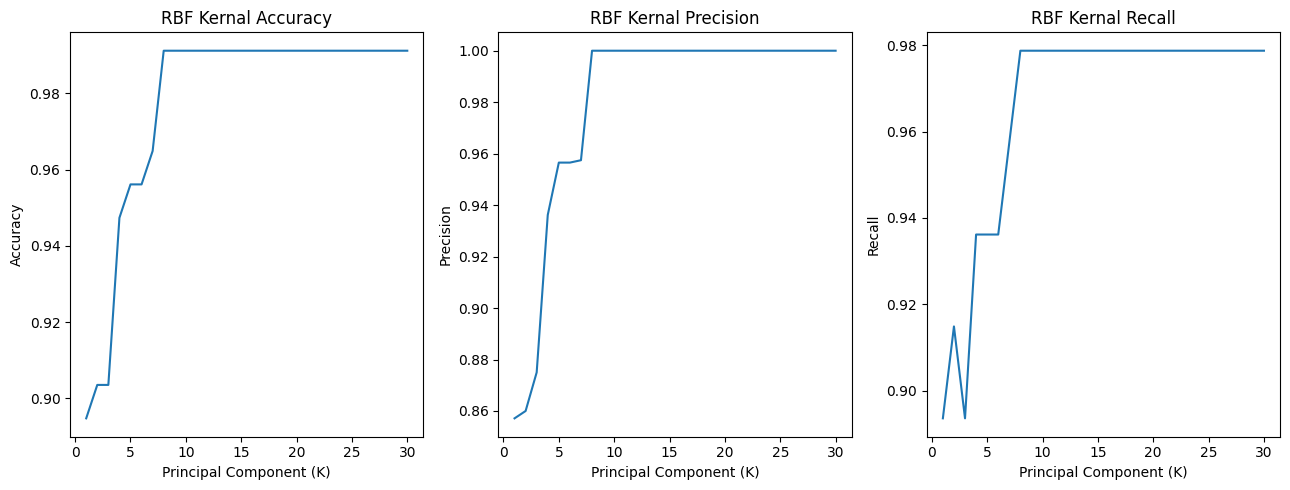

Optimum Number of K Principal Components: 8
RBF Highest Accuracy Value: 0.9912280701754386
RBF Precision at best K: 1.0
RBF Recall at best K: 0.9787234042553191


In [58]:
N = [i for i in range(1, 31)]

accuracy, precision, recall, highest_acc, k_val = train_SVM(x, y, 'rbf', N)

plt.figure(figsize=(13, 5))

plt.subplot(1, 3, 1)
plt.plot(N, accuracy)
plt.title('RBF Kernal Accuracy')
plt.xlabel('Principal Component (K)')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(N, precision)
plt.title('RBF Kernal Precision')
plt.xlabel('Principal Component (K)')
plt.ylabel('Precision')

plt.subplot(1, 3, 3)
plt.plot(N, recall)
plt.title('RBF Kernal Recall')
plt.xlabel('Principal Component (K)')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()

print(f'Optimum Number of K Principal Components: {k_val}')
print(f'RBF Highest Accuracy Value: {highest_acc}')

# Print precision and recall at the best K value
best_k_index = N.index(k_val)
print(f'RBF Precision at best K: {precision[best_k_index]}')
print(f'RBF Recall at best K: {recall[best_k_index]}')

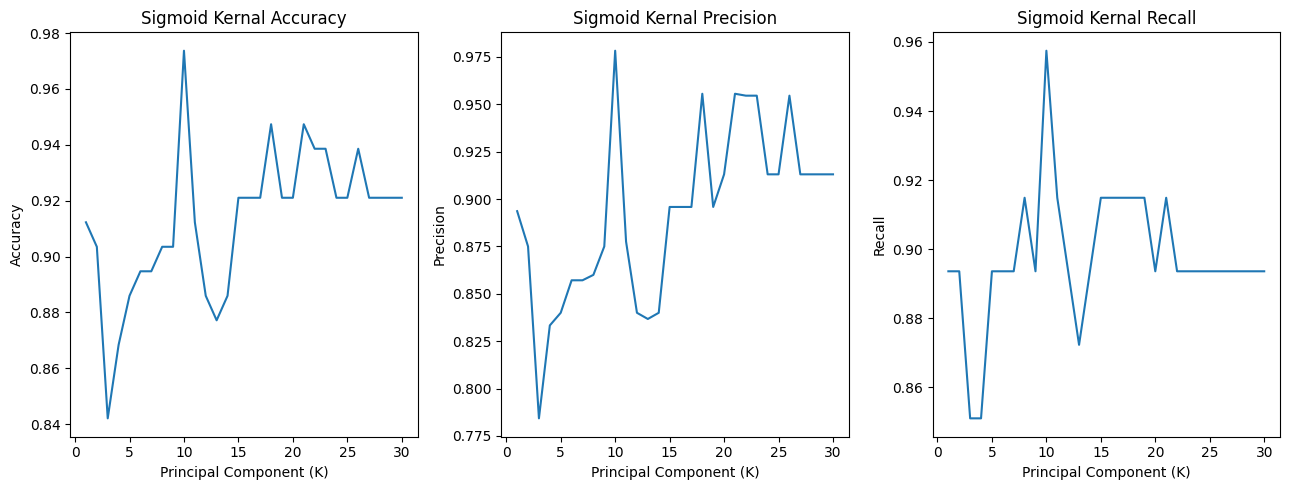

Optimum Number of K Principal Components: 10
Sigmoid Highest Accuracy Value: 0.9736842105263158
Sigmoid Precision at best K: 0.9782608695652174
Sigmoid Recall at best K: 0.9574468085106383


In [59]:
N = [i for i in range(1, 31)]

accuracy, precision, recall, highest_acc, k_val = train_SVM(x, y, 'sigmoid', N)

plt.figure(figsize=(13, 5))

plt.subplot(1, 3, 1)
plt.plot(N, accuracy)
plt.title('Sigmoid Kernal Accuracy')
plt.xlabel('Principal Component (K)')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(N, precision)
plt.title('Sigmoid Kernal Precision')
plt.xlabel('Principal Component (K)')
plt.ylabel('Precision')

plt.subplot(1, 3, 3)
plt.plot(N, recall)
plt.title('Sigmoid Kernal Recall')
plt.xlabel('Principal Component (K)')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()

print(f'Optimum Number of K Principal Components: {k_val}')
print(f'Sigmoid Highest Accuracy Value: {highest_acc}')

# Print precision and recall at the best K value
best_k_index = N.index(k_val)
print(f'Sigmoid Precision at best K: {precision[best_k_index]}')
print(f'Sigmoid Recall at best K: {recall[best_k_index]}')

Problem 2

In [60]:
# List of variables to map
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
dfh[varlist] = dfh[varlist].apply(binary_map)
dfh = dfh.drop('furnishingstatus', axis=1)

# Separate x and y
x = dfh.drop('price', axis=1)
y = dfh['price'].values.reshape(-1, 1)

# Standardize data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [ ]:
# Fit SVR models on the training data
svr_rbf = SVR(kernel='rbf', C=1, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1)
svr_poly = SVR(kernel='poly', C=1, degree=2)
svr_sig = SVR(kernel='sigmoid', C=1, degree=2)

y_rbf = svr_rbf.fit(x_train, y_train.ravel()).predict(x_test)
y_lin = svr_lin.fit(x_train, y_train.ravel()).predict(x_test)
y_poly = svr_poly.fit(x_train, y_train.ravel()).predict(x_test)
y_sig = svr_poly.fit(x_train, y_train.ravel()).predict(x_test)

# Look at the results
plt.figure(figsize=(13, 5))

plt.subplot(1, 4, 1)
plt.scatter(y_lin, y_test, color='blue', label='test data')
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('Linear Support Vector Regression')

plt.subplot(1, 4, 2)
plt.scatter(y_rbf, y_test, color='green', label='test data')
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('RBF Support Vector Regression')

plt.subplot(1, 4, 3)
plt.scatter(y_poly, y_test, color='red', label='test data')
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('Poly Support Vector Regression')

plt.subplot(1, 4, 4)
plt.scatter(y_poly, y_test, color='black', label='test data')
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('Sigmoid Support Vector Regression')

plt.tight_layout()
plt.show()

In [82]:
def train_SVR(x, y, kernel_in, N):

    mse_scores = [] # Use MSE for regression

    # Initialize variables to store the best K and lowest MSE
    best_K = None
    lowest_mse = float('inf') # Initialize with positive infinity

    for K in N:
      # Perform PCA
      pca = PCA(n_components=K)
      principalDf = pd.DataFrame(data = pca.fit_transform(x))

      # Split the data into training and validation sets
      x_train, x_test, y_train, y_test = train_test_split(principalDf.values, y, train_size = 0.8, test_size = 0.2, random_state = 0)

      # Perform regression
      regressor = SVR(kernel=kernel_in, C=1)
      regressor.fit(x_train, y_train.ravel()) # Apply ravel() here

       # Perform classification
      classifier = SVC(kernel=kernel_in, C=3)
      classifier.fit(x_train, y_train)

      # Predictions of accuracy, precision and recall
      y_pred = classifier.predict(x_test)
      accuracy = accuracy_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred)
      recall = recall_score(y_test, y_pred)

      accuracy_scores.append(accuracy)
      precision_scores.append(precision)
      recall_scores.append(recall)

      # Check if this K has the highest accuracy
      if accuracy > highest_accuracy:
          highest_accuracy = accuracy
          best_K = K

    return accuracy_scores, precision_scores, recall_scores, highest_accuracy, best_K

In [ ]:
N = [i for i in range(1, 31)]

accuracy, precision, recall, highest_acc, k_val = train_SVR(x, y, 'linear', N)

plt.figure(figsize=(13, 5))

plt.subplot(1, 3, 1)
plt.plot(N, accuracy)
plt.title('Linear Kernal Accuracy')
plt.xlabel('Principal Component (K)')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(N, precision)
plt.title('Linear Kernal Precision')
plt.xlabel('Principal Component (K)')
plt.ylabel('Precision')

plt.subplot(1, 3, 3)
plt.plot(N, recall)
plt.title('Linear Kernal Recall')
plt.xlabel('Principal Component (K)')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()

print(f'Optimum Number of K Principal Components: {k_val}')
print(f'Linear Highest Accuracy Value: {highest_acc}')

# Print precision and recall at the best K value
best_k_index = N.index(k_val)
print(f'Linear Precision at best K: {precision[best_k_index]}')
print(f'Linear Recall at best K: {recall[best_k_index]}')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
